In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltplt

In [ ]:
df=pd.read_csv('/content/iris_data.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


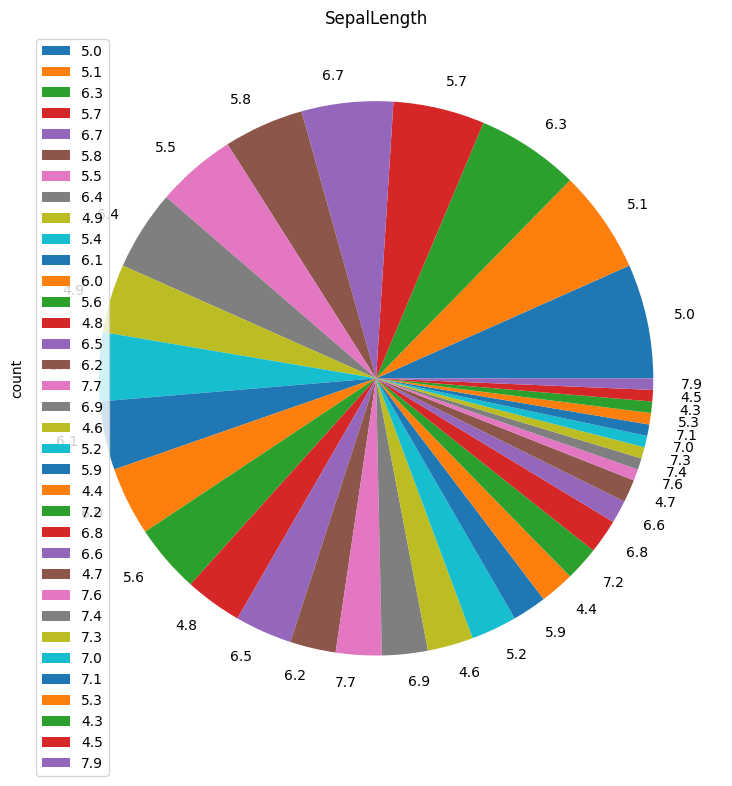

In [ ]:
SepalLength = df['SepalLengthCm'].value_counts()
%matplotlib inline
from matplotlib import pyplot as plt
SepalLength.plot(kind='pie', title='SepalLength', figsize=(9,9))
plt.legend()
plt.show()

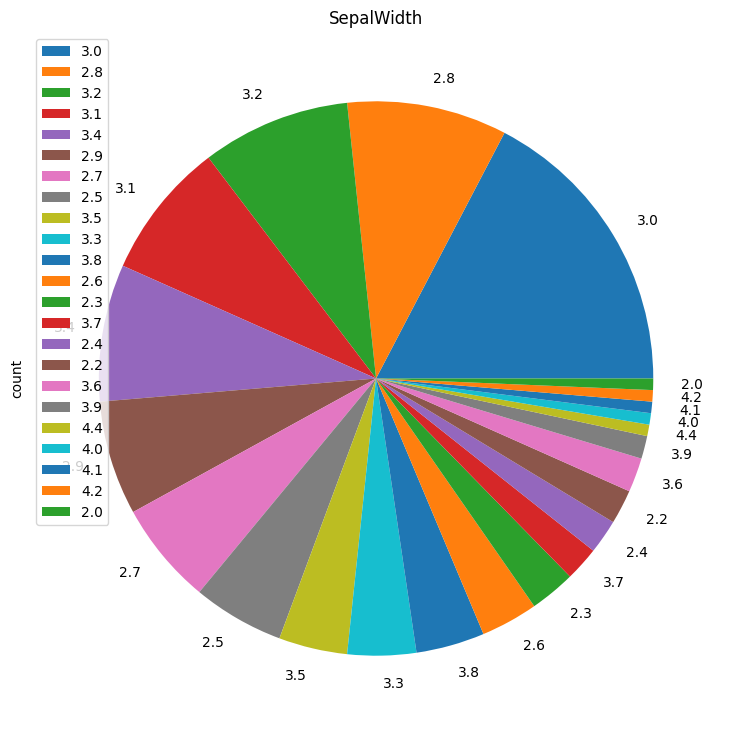

In [ ]:
SepalWidth= df['SepalWidthCm'].value_counts()
%matplotlib inline
from matplotlib import pyplot as plt
SepalWidth.plot(kind='pie', title='SepalWidth', figsize=(9,9))
plt.legend()
plt.show()

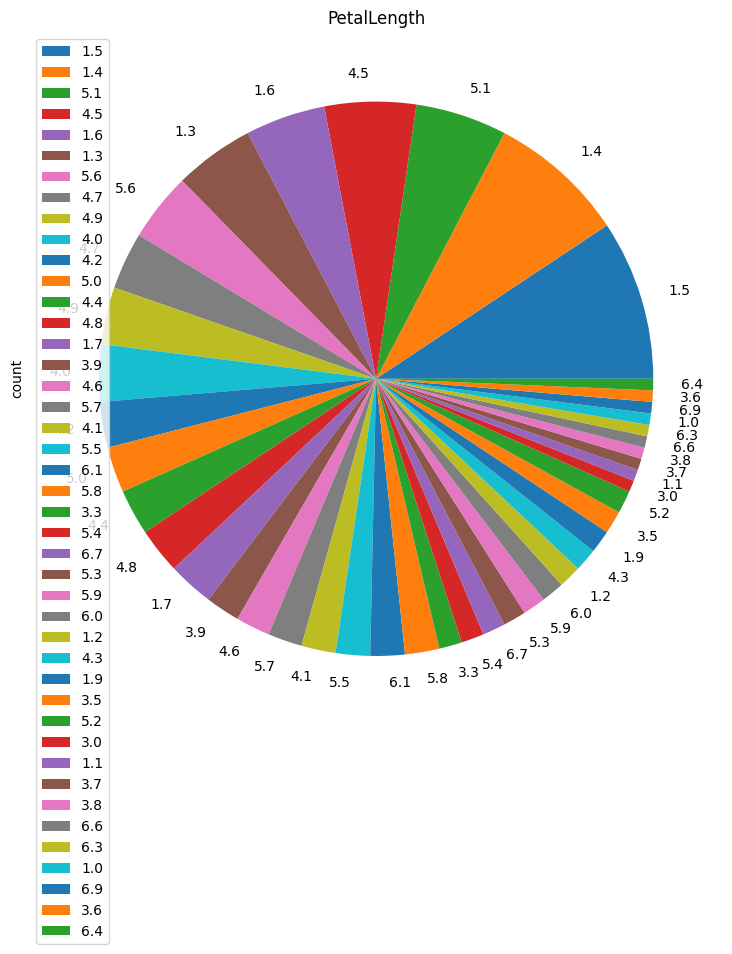

In [ ]:
PetalLength= df['PetalLengthCm'].value_counts()
%matplotlib inline
from matplotlib import pyplot as plt
PetalLength.plot(kind='pie', title='PetalLength', figsize=(9,9))
plt.legend()
plt.show()

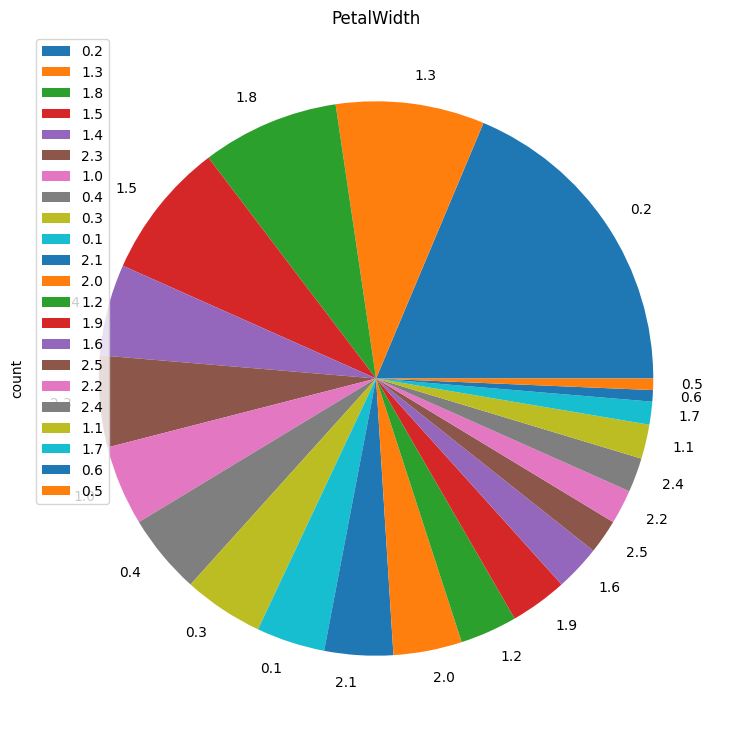

In [ ]:
PetalWidth= df['PetalWidthCm'].value_counts()
%matplotlib inline
from matplotlib import pyplot as plt
PetalWidth.plot(kind='pie', title='PetalWidth', figsize=(9,9))
plt.legend()
plt.show()

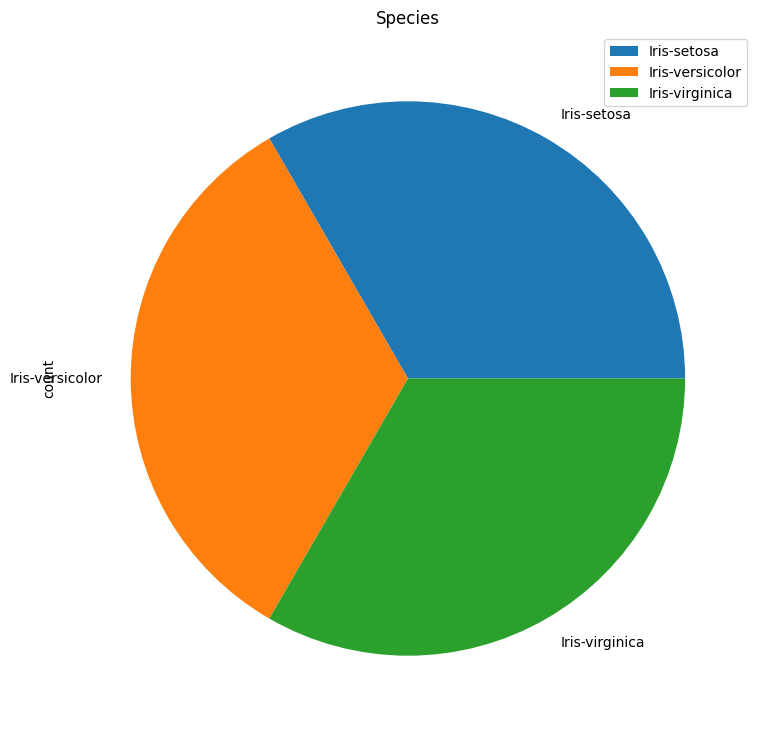

In [ ]:
Species= df['Species'].value_counts()
%matplotlib inline
from matplotlib import pyplot as plt
Species.plot(kind='pie', title='Species', figsize=(9,9))
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
from tensorflow import keras

In [ ]:
df['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lev = LabelEncoder()
df['Species']= lev.fit_transform(df['Species'])


In [ ]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [ ]:
species_name = lev.classes_
print(species_name)

[0 1 2]


In [ ]:
x=df.drop(columns=['Id','Species'])
y=df['Species']
x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
print(y[:8])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: Species, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3,  random_state=69)
x_train.shape

(105, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()
print(x_train[:2])
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:2])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57             4.9           2.4            3.3           1.0
142            5.8           2.7            5.1           1.9
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]
 [-0.03754545 -0.73865995  0.7974008   0.98061283]]


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summery()

AttributeError: 'Sequential' object has no attribute 'summery'

In [ ]:
model= Sequential()
model.add(Dense(units=30,activation = 'relu', input_shape=(x_train.shape[-1], ) ))
model.add(Dense(units=30,activation = 'relu' ))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 30)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,173 (4.58 KB)

 Trainable params: 1,173 (4.58 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4979 - loss: 0.9891
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 0.9134  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 0.7962 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7101 - loss: 0.7042  
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7388 - loss: 0.6780 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.6199 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.5819 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.5322 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4894  
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4280 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8154 - loss: 0.4499 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
prediction=model.predict(x_test)
print(prediction[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[9.99999344e-01 6.41226222e-07 3.74631298e-10]
 [1.71109661e-03 9.90508497e-01 7.78044248e-03]
 [9.99989450e-01 1.05290410e-05 5.59476021e-09]
 [2.00995984e-07 3.86019656e-03 9.96139526e-01]
 [9.99983251e-01 1.66781665e-05 1.13379066e-08]
 [9.99999821e-01 1.07613275e-07 1.10594360e-10]
 [2.91976822e-03 9.86780763e-01 1.02993762e-02]
 [2.05326486e-07 5.98417362e-03 9.94015574e-01]
 [2.11654351e-05 1.40949547e-01 8.59029233e-01]
 [9.99999821e-01 6.26081302e-08 5.32675778e-11]]


In [ ]:
prediction=np.argmax(prediction, axis=1)
print(prediction[:10])

[0 1 0 2 0 0 1 2 2 0]


In [ ]:
print(y_test[:10])

4      0
58     1
20     0
114    2
31     0
33     0
94     1
102    2
129    2
32     0
Name: Species, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,prediction))

0.9777777777777777


In [ ]:
cm= confusion_matrix(y_test,prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(0.5, 1.0, 'Confusion matrix')

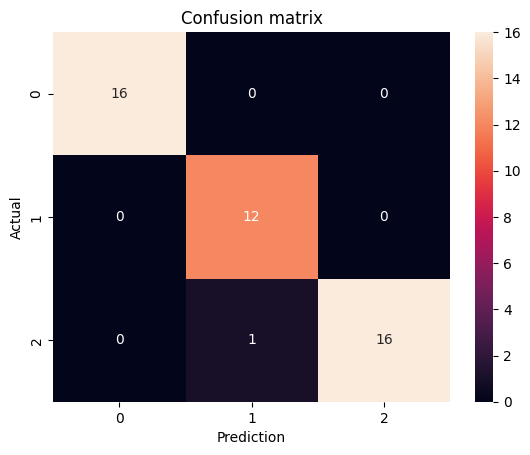

In [ ]:
ax= sns.heatmap(cm,annot=True,fmt='g')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')